In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
#loading data
housing_data = pd.read_csv(r'C:\Users\Pavithra\OneDrive\Desktop\assignments\machine_learning\clustering\housing.csv')
housing_data.head() #displaying first 5 rows of the dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
#displaying number of rows and columns of the dataset
housing_data.shape

(20640, 9)

In [4]:
#displaying number of elements 
housing_data.size

185760

In [5]:
#basic information of the data
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
#summary statistics
housing_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
#checking for missing values
housing_data.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [8]:
# Rounding all numeric columns to 2 decimal points
housing_data = housing_data.round(2)
# Display the first few rows to confirm the rounding
housing_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.33,41.0,6.98,1.02,322.0,2.56,37.88,-122.23,4.53
1,8.30,21.0,6.24,0.97,2401.0,2.11,37.86,-122.22,3.58
2,7.26,52.0,8.29,1.07,496.0,2.80,37.85,-122.24,3.52
3,5.64,52.0,5.82,1.07,558.0,2.55,37.85,-122.25,3.41
4,3.85,52.0,6.28,1.08,565.0,2.18,37.85,-122.25,3.42


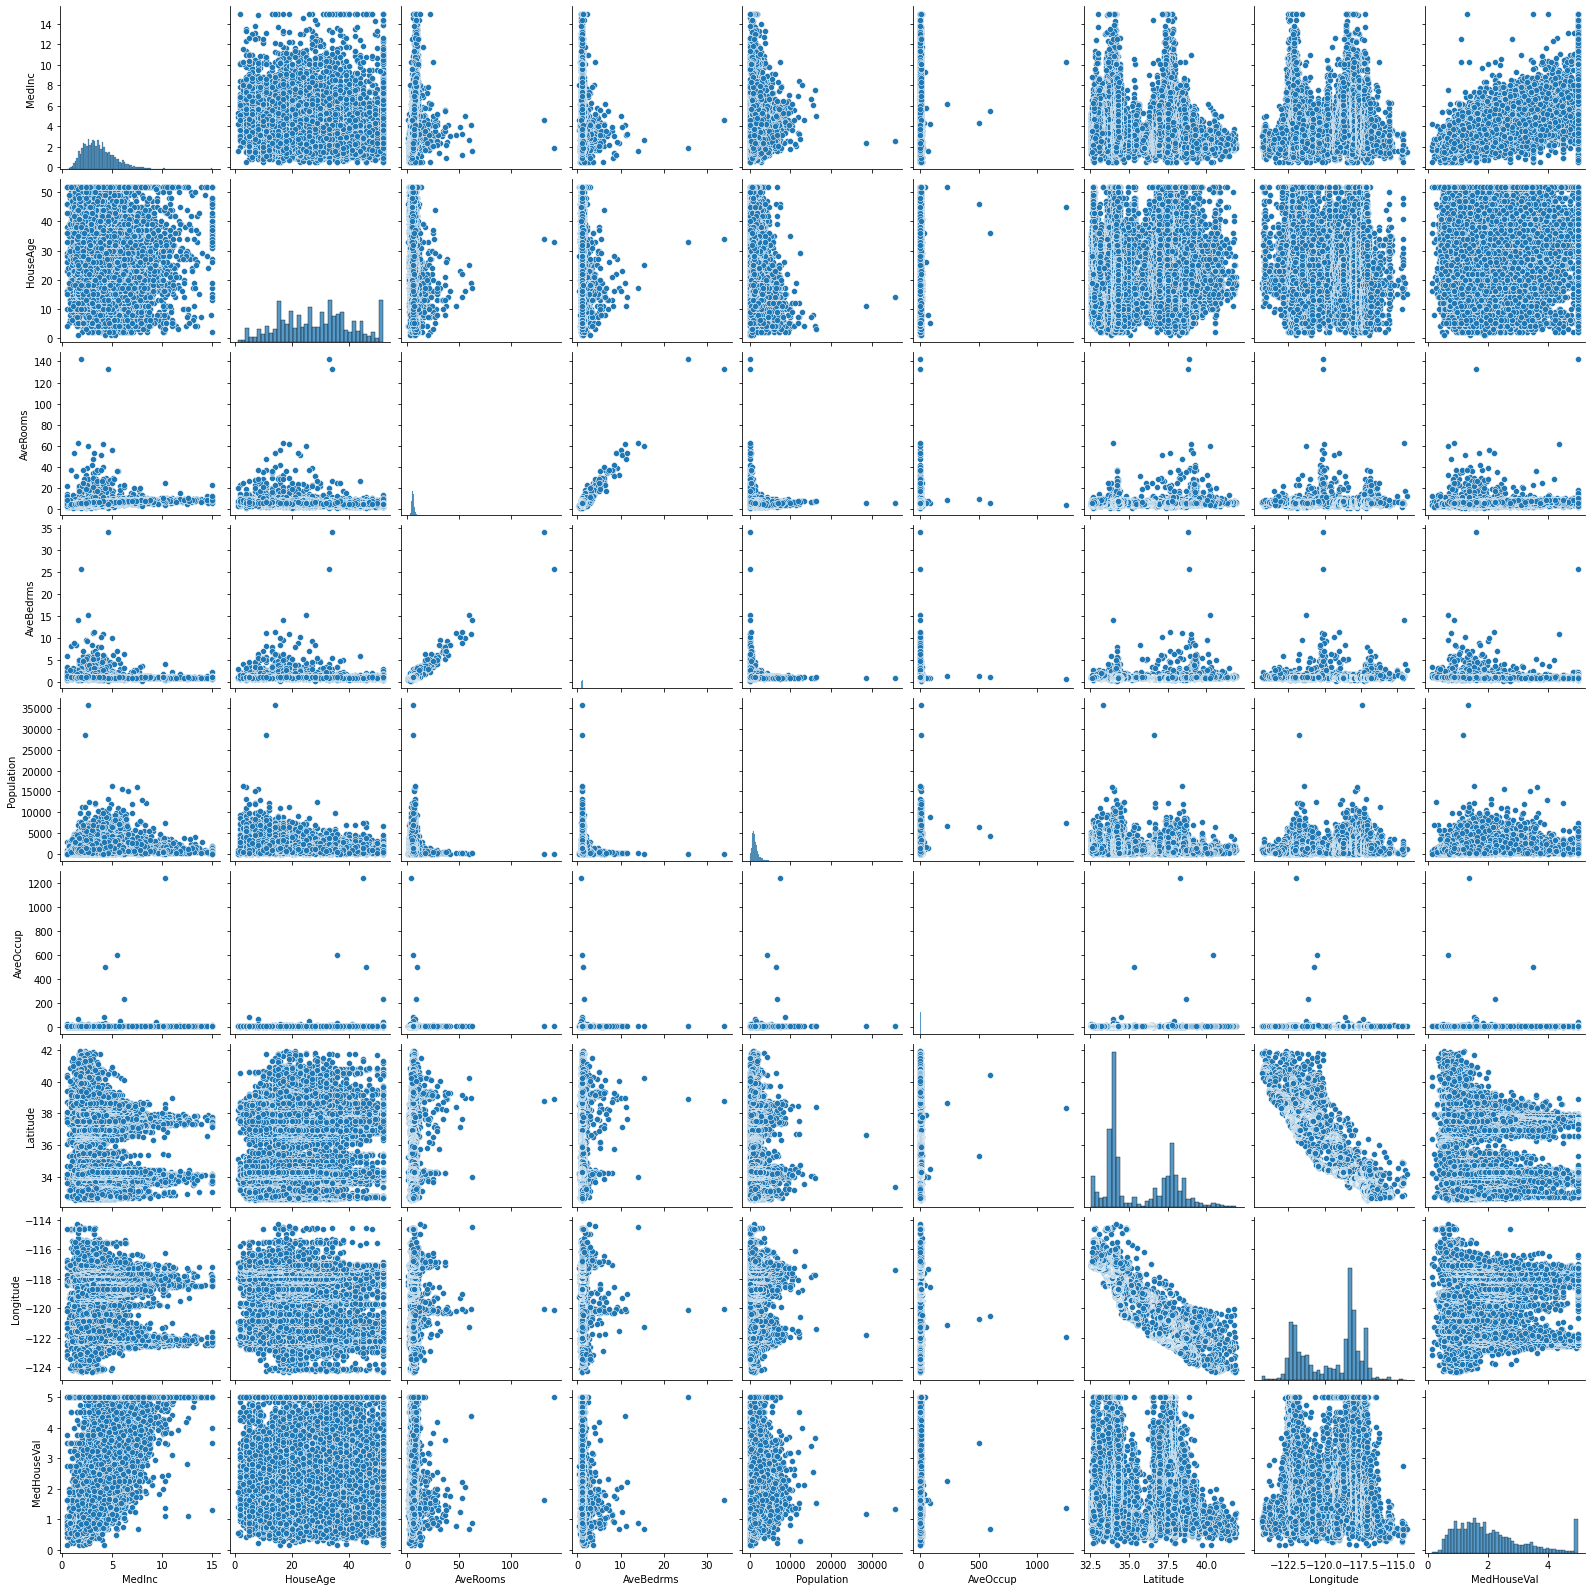

In [9]:
sns.pairplot(housing_data)

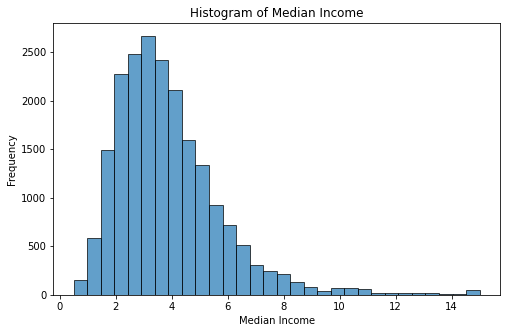

In [10]:
# Plotting histograms, comparison plot between two columns, and distribution plots

# Setting the columns for visualization
column1 = 'MedInc'
# 1. Histogram Plot for Median Income
plt.figure(figsize=(8, 5))
plt.hist(housing_data['MedInc'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Median Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

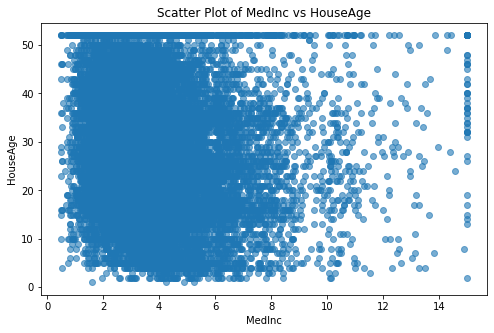

In [11]:
# 2. Comparison Plot (Scatter Plot) between Median Income and House Age
plt.figure(figsize=(8, 5))
plt.scatter(housing_data[column1], housing_data[column2], alpha=0.6)
plt.title(f'Scatter Plot of {column1} vs {column2}')
plt.xlabel(column1)
plt.ylabel(column2)
plt.show()

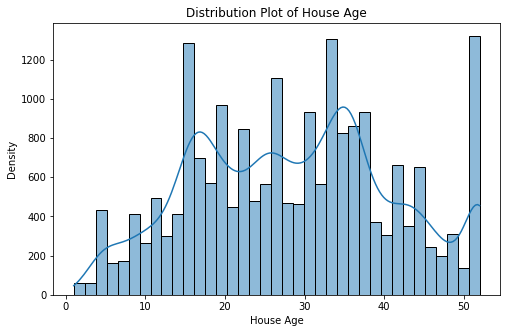

In [12]:
# 3. Distribution Plot for House Age
plt.figure(figsize=(8, 5))
sns.histplot(housing_data['HouseAge'], kde=True)
plt.title('Distribution Plot of House Age')
plt.xlabel('House Age')
plt.ylabel('Density')
plt.show()

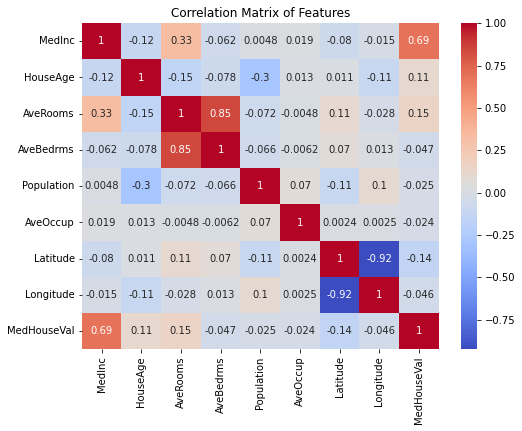

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(housing_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

### Outlier check

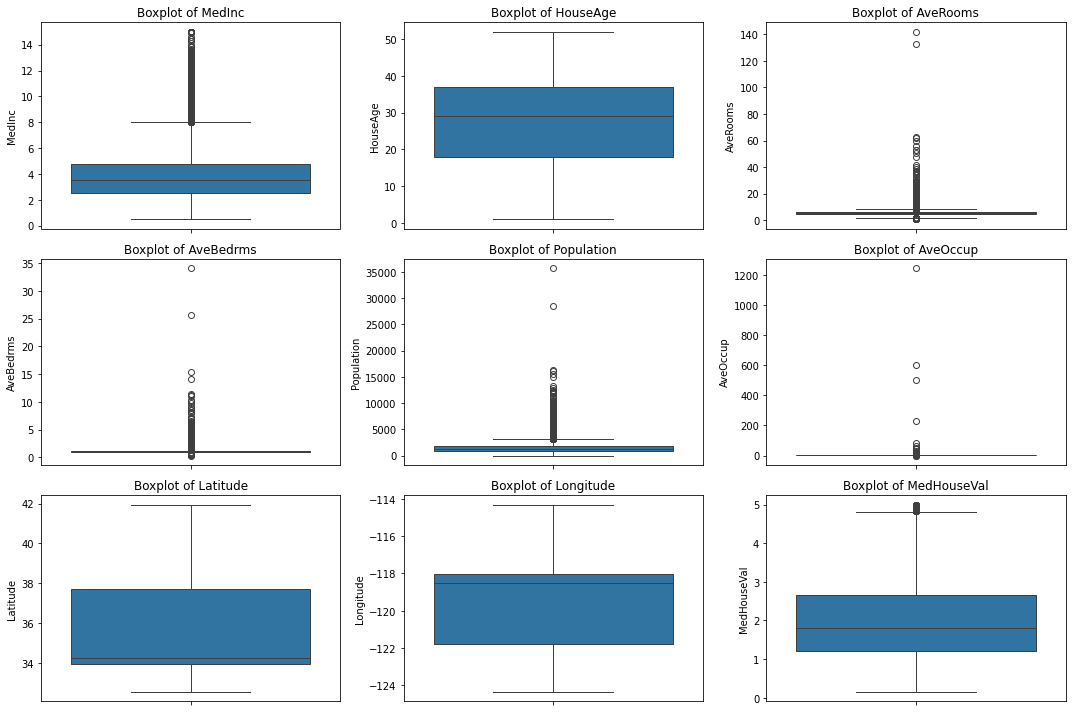

In [14]:
# Plotting boxplots for each feature to check for outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(housing_data.columns, 1):
    plt.subplot(3, 3, i)  # Adjust layout based on the number of columns
    sns.boxplot(data=housing_data[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

In [15]:
# Define the columns from which to remove outliers
columns_to_check = ['AveRooms', 'AveOccup']

# Copy the dataset to keep the original intact
cleaned_data = housing_data.copy()

# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to each specified column
for column in columns_to_check:
    cleaned_data = remove_outliers(cleaned_data, column)

# Display the shape of the original and cleaned dataset to see the difference
print("Original dataset shape:", housing_data.shape)
print("Cleaned dataset shape:", cleaned_data.shape)

Original dataset shape: (20640, 9)
Cleaned dataset shape: (19453, 9)


In [16]:
#standardization using MinMaxScaler()
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(cleaned_data)

In [17]:
# Initializing PCA to reduce dimensions, choosing 2 components for easy visualization
pca = PCA(n_components=2)

# Fitting PCA on the scaled data
pca_data = pca.fit_transform(scaled_data)

# Creating a DataFrame with the PCA components
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# Displaying the first few rows of the PCA result
pca_df.head()

,PC1,PC2
0,0.365327,0.666154
1,0.335926,0.450316
2,0.403063,0.544497
3,0.399914,0.376955
4,0.422346,0.385972


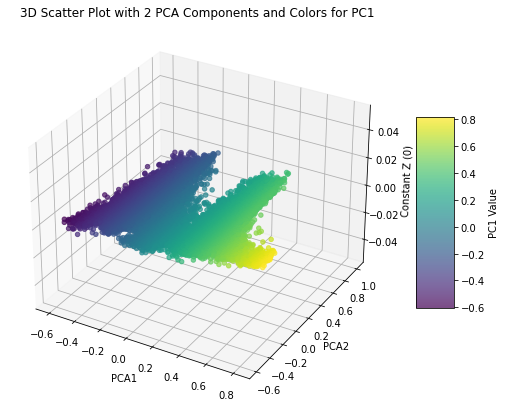

In [18]:
# 3D scatter plot with colors based on PC1 values
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], zs=0, zdir='z', c=pca_df['PC1'], cmap='viridis', alpha=0.7)

# Adding color bar for reference
color_bar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
color_bar.set_label('PC1 Value')

# Setting labels
ax.set_title('3D Scatter Plot with 2 PCA Components and Colors for PC1')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('Constant Z (0)')

plt.show()

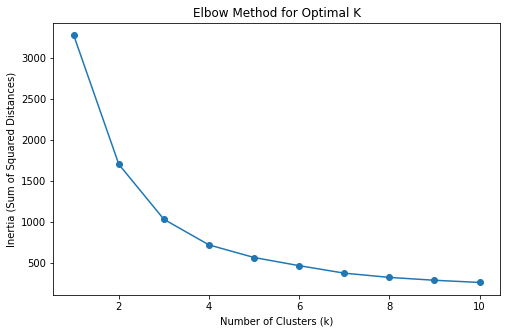

In [19]:
# Range of cluster numbers to test
cluster_range = range(1, 11)
inertia = []

# Compute KMeans for each cluster count and store the inertia
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)  # Explicitly set n_init=10
    kmeans.fit(pca_df)  # Assuming PCA has reduced data to 2 or 3 dimensions
    inertia.append(kmeans.inertia_)

# Plotting the elbow method results
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()

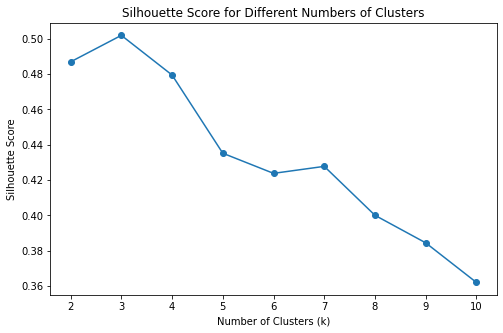

In [20]:
silhouette_scores = []

for k in range(2, 11):  # Starting from 2 because silhouette score is undefined for 1 cluster
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(pca_df)
    score = silhouette_score(pca_df, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

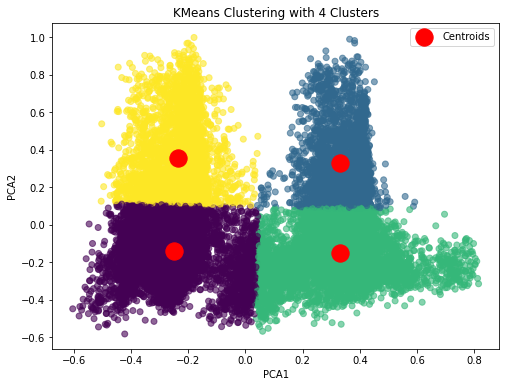

In [21]:
# Set the number of clusters to 2
n_clusters = 4

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
kmeans.fit(pca_df)  # Assuming PCA-reduced dataset with 2 components

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', marker='o', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title(f'KMeans Clustering with {n_clusters} Clusters')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

### hierarchial clustering

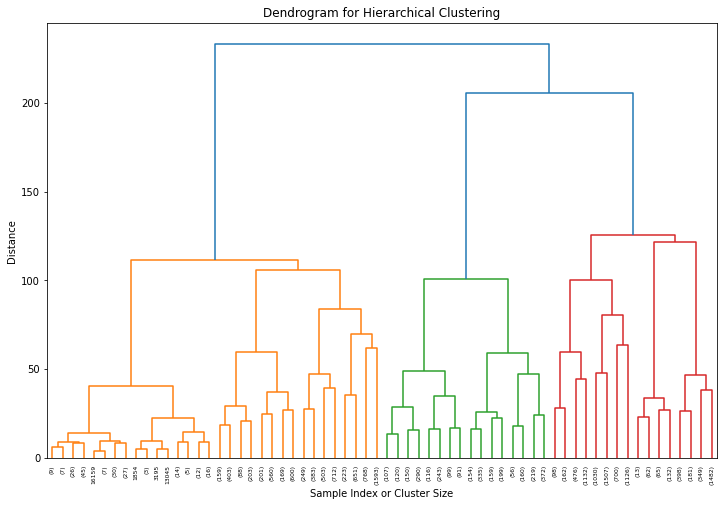

In [22]:
# Standardizing the data (optional but recommended for hierarchical clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)

# Perform hierarchical/agglomerative clustering
# Using 'ward' linkage method, which minimizes the variance of merged clusters
linkage_matrix = linkage(scaled_data, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5)  # p=5 limits to top levels for readability
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

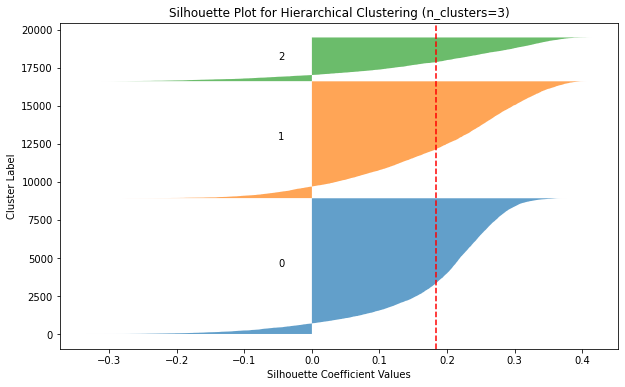

In [25]:
from sklearn.metrics import silhouette_samples
# Perform Agglomerative Clustering (Hierarchical Clustering)
n_clusters = 3  # Change this to the desired number of clusters
agglo_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = agglo_cluster.fit_predict(scaled_data)

# Calculate the silhouette score for each sample
silhouette_vals = silhouette_samples(scaled_data, cluster_labels)
silhouette_avg = silhouette_score(scaled_data, cluster_labels)

# Silhouette Plot
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(n_clusters):
    # Aggregate silhouette scores for samples in the same cluster
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals, alpha=0.7)

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Space between plots

plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.title(f'Silhouette Plot for Hierarchical Clustering (n_clusters={n_clusters})')
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")
plt.show()

In [26]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)  

# KMeans Clustering
n_clusters = 4  # Adjust based on prior analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cleaned_data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Agglomerative Clustering (Hierarchical Clustering)
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cleaned_data['Agglo_Cluster'] = agglo.fit_predict(scaled_data)

# Analyze Clusters for Both Clustering Techniques
kmeans_cluster_analysis = cleaned_data.groupby('KMeans_Cluster').mean()
agglo_cluster_analysis = cleaned_data.groupby('Agglo_Cluster').mean()

# Display the analysis results
print("KMeans Cluster Analysis (Mean values per feature for each cluster):")
print(kmeans_cluster_analysis)
print("\nAgglomerative Cluster Analysis (Mean values per feature for each cluster):")
print(agglo_cluster_analysis)

C:\Users\Pavithra\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans Cluster Analysis (Mean values per feature for each cluster):
                  MedInc   HouseAge  AveRooms  AveBedrms   Population  \
KMeans_Cluster                                                          
0               6.797329  25.213120  6.772919   1.032398  1516.637163   
1               3.304397  29.742692  5.220535   1.074781  1226.151520   
2               3.552061  28.332348  4.946683   1.069660  1333.508539   
3               2.706823  30.934803  4.490413   1.052036  1902.197735   

                AveOccup   Latitude   Longitude  MedHouseVal  Agglo_Cluster  
KMeans_Cluster                                                               
0               2.864975  35.271036 -119.571908     3.570599       1.048964  
1               2.667680  38.039420 -121.736839     1.718282       0.008973  
2               2.599627  33.832883 -117.902601     2.094703       2.768637  
3               3.673373  34.373869 -118.321846     1.328757       1.629936  

Agglomerative Cluster An

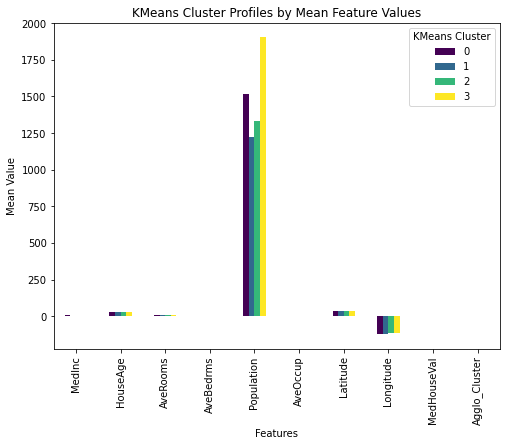

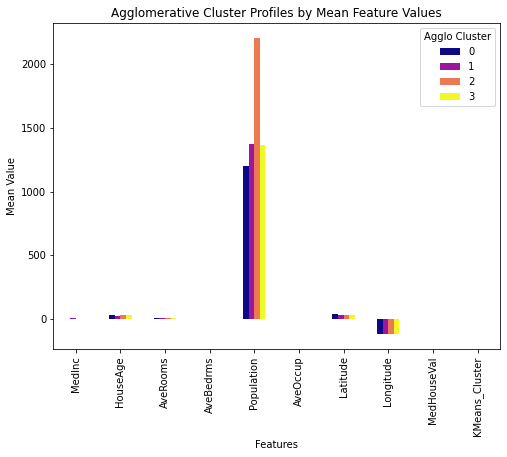

In [29]:
# Visualize Cluster Profiles for Both Techniques

# Transpose data for better plotting
kmeans_cluster_analysis.T.plot(kind='bar', figsize=(8, 6), colormap='viridis')
plt.title("KMeans Cluster Profiles by Mean Feature Values")
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.legend(title='KMeans Cluster')
plt.show()

agglo_cluster_analysis.T.plot(kind='bar', figsize=(8, 6), colormap='plasma')
plt.title("Agglomerative Cluster Profiles by Mean Feature Values")
plt.xlabel("Features")
plt.ylabel("Mean Value")
plt.legend(title='Agglo Cluster')
plt.show()